In [1]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
# Display all of the columns
pd.set_option('display.max_columns', None)

In [2]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [3]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [4]:
df_reduce =df.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash'], inplace=False)
df_reduce

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment
0,870038,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142
1,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124
2,870040,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47
3,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124
4,870040,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,876966,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Fab/Layout,16751
8403,876966,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Material Handling,17
8404,876966,1,PIPE,8.03,16.440,7.73,API,1 1/4SCH40,L - Anodized Aluminum,1,3,Weld,4153
8405,904279,1,PLATE,9.92,94.903,25.14,PL,3/16 x 15,"D - Steel, Paint All",1,0,Fab/Layout,9562


In [5]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_SurfaceAreaEachSqFt',
       'Assembly_MainPartShape', 'Assembly_MainPartDimension',
       'Assembly_MainPartFinishDescr', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'EPM_AdjustedStationName',
       'TimeInSeconds_ThisWorkSegment'],
      dtype='object')

In [6]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID         2058
EPM_InstanceNumber                   669
Assembly_MainPieceProductionCode      58
Assembly_MainPartLengthFt            944
Assembly_WeightEachLbs              1642
Assembly_SurfaceAreaEachSqFt        1530
Assembly_MainPartShape                19
Assembly_MainPartDimension           340
Assembly_MainPartFinishDescr          11
Assembly_TotalQuantityInJob           58
Assembly_NumSmallParts                89
EPM_AdjustedStationName                8
TimeInSeconds_ThisWorkSegment       2670
dtype: int64


In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM BEAM,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM CHKD PLATE,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PIPE LADDER,Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ALUM TUBE COLUMN,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_BRACE,Assembly_MainPieceProductionCode_BRACKET,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_CHK PLATE,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_DOOR PLATE,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED ANGLE,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_GALV. STRINGER,Assembly_MainPieceProductionCode_GUSSET PL,Assembly_MainPieceProductionCode_H BRACE,Assembly_MainPieceProductionCode_HSS STRUT,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_S.S. BENT PLATE,Assembly_MainPieceProductionCode_S.S. EMBED ANGLE,Assembly_MainPieceProductionCode_S.S. PLATE,Assembly_MainPieceProductionCode_S.S. PLATE LADDER,Assembly_MainPieceProductionCode_S.S. TUBE STEEL,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_SS PLATE,Assembly_MainPieceProductionCode_STAIR STRINGER,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS CHORD,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_TUBE STEEL BRIDGING,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPieceProductionCode_WASHER,Assembly_MainPieceProductionCode_WT,Assembly_MainPieceProductionCode_WT SHEAR COLLECTOR,Assembly_MainPieceProductionCode_WT TOP TRUSS,Assembly_MainPieceProductionCode_WT TRUSS,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_1/2 x 22,Assembly_MainPartDimension_1/2 x 29 §,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 3 1/2,Assembly_MainPartDimension_1/2 x 3 15/16 §,Assembly_MainPartDimension_1/2 x

In [8]:
X = df_reduce_encoded.copy()
X.drop("Assembly_SurfaceAreaEachSqFt", axis=1, inplace=True)
X.head()

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM BEAM,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM CHKD PLATE,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PIPE LADDER,Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ALUM TUBE COLUMN,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_BRACE,Assembly_MainPieceProductionCode_BRACKET,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_CHK PLATE,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_DOOR PLATE,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED ANGLE,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_GALV. STRINGER,Assembly_MainPieceProductionCode_GUSSET PL,Assembly_MainPieceProductionCode_H BRACE,Assembly_MainPieceProductionCode_HSS STRUT,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_S.S. BENT PLATE,Assembly_MainPieceProductionCode_S.S. EMBED ANGLE,Assembly_MainPieceProductionCode_S.S. PLATE,Assembly_MainPieceProductionCode_S.S. PLATE LADDER,Assembly_MainPieceProductionCode_S.S. TUBE STEEL,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_SS PLATE,Assembly_MainPieceProductionCode_STAIR STRINGER,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS CHORD,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_TUBE STEEL BRIDGING,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPieceProductionCode_WASHER,Assembly_MainPieceProductionCode_WT,Assembly_MainPieceProductionCode_WT SHEAR COLLECTOR,Assembly_MainPieceProductionCode_WT TOP TRUSS,Assembly_MainPieceProductionCode_WT TRUSS,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_1/2 x 22,Assembly_MainPartDimension_1/2 x 29 §,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 3 1/2,Assembly_MainPartDimension_1/2 x 3 15/16 §,Assembly_MainPartDimension_1/2 x 32,Assembly_MainPartDimensio

In [9]:
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment'].ravel()
y[:5]

array([142, 124,  47, 124,  48], dtype=int64)

In [10]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (8407, 443)
Targe Shape: (8407,)


In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [14]:
X_scaler

StandardScaler()

In [15]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_test_scaled

array([[ 0.10556837,  0.22672806, -0.94368919, ..., -0.09965502,
        -0.16595895, -0.50767106],
       [ 0.46324283, -0.33595074,  0.37076868, ..., -0.09965502,
         6.02558647, -0.50767106],
       [ 0.41813736, -0.33962838,  1.82876968, ..., -0.09965502,
        -0.16595895, -0.50767106],
       ...,
       [ 1.44152022,  0.11272125, -0.32798846, ..., -0.09965502,
        -0.16595895, -0.50767106],
       [ 0.88048593, -0.33962838, -0.1934732 , ..., -0.09965502,
        -0.16595895, -0.50767106],
       [-0.82989734, -0.32859546, -0.9364669 , ..., -0.09965502,
        -0.16595895, -0.50767106]])

# Fitting the Random Forest Model

In [17]:
# Instantiate the Random Forest Regression model
rf_reg = RandomForestRegressor()

In [18]:
# Fit the model to the training data
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [19]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

In [20]:
# Evaluate the model
print("Random Forest Regression Model Score (R^2):", rf_reg.score(X_test_scaled, y_test))
print("Random Forest Regression Mean Absolute Error:", np.mean(np.abs(y_pred_rf - y_test)))

Random Forest Regression Model Score (R^2): 0.9910102531607591
Random Forest Regression Mean Absolute Error: 43.91737392959089


In [21]:
# Display feature importances
feature_importances = rf_reg.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Feature Importances:
EPM_ProductionControlItemID: 0.008201882383028311
EPM_InstanceNumber: 7.454377356267843e-07
Assembly_MainPartLengthFt: 0.00011324230269961372
Assembly_WeightEachLbs: 0.014832811964236007
Assembly_TotalQuantityInJob: 2.287132464085247e-06
Assembly_NumSmallParts: 0.005872366051088594
TimeInSeconds_ThisWorkSegment: 0.9539033525287105
Assembly_MainPieceProductionCode_ALUM ANGLE: 6.83520521879223e-11
Assembly_MainPieceProductionCode_ALUM BEAM: 1.584519457737077e-13
Assembly_MainPieceProductionCode_ALUM CHANNEL: 3.9910757106247605e-12
Assembly_MainPieceProductionCode_ALUM CHKD PLATE: 3.0217348608576756e-12
Assembly_MainPieceProductionCode_ALUM EMBED ANGLE: 3.17186101899604e-12
Assembly_MainPieceProductionCode_ALUM PIPE: 0.0
Assembly_MainPieceProductionCode_ALUM PIPE LADDER: 8.431616772290555e-10
Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE: 0.0
Assembly_MainPieceProductionCode_ALUM PLATE: 8.091434746836554e-11
Assembly_MainPieceProductionCode_ALUM STRINGER: 1.230603

# Predict and Plot

In [22]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
predictions.head()

,Actual,Predicted
0,0,0.00
1,4908,4906.72
2,218,217.40
3,3990,3981.73
4,14,14.00


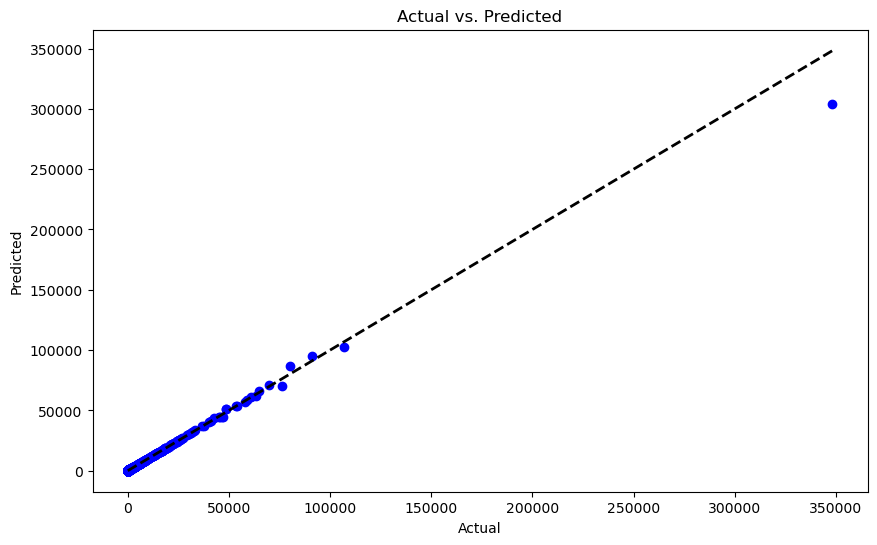

In [23]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model Score (R^2):", r2)
print("Random Forest Regression Mean Absolute Error:", mae)

Random Forest Regression Model Score (R^2): 0.9910102531607591
Random Forest Regression Mean Absolute Error: 43.91737392959089


- The R-squared score of 0.988 indicates that approximately 98.8% of the variance in the target variable can be explained by the features in the model.- 
The Mean Absolute Error (MAE) of 48.87 seconds indicates that, on average, the model's predictions are off by approximately 48.87 seconds.

# Random Forest Classifer

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Convert TimeInSeconds_ThisWorkSegment to categorical variable
y_class = pd.qcut(df_reduce_encoded['TimeInSeconds_ThisWorkSegment'], q=5, labels=[1, 2, 3, 4, 5])

In [27]:
# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [28]:
# Scale the features
scaler_class = StandardScaler()
X_train_scaled_class = scaler_class.fit_transform(X_train_class)
X_test_scaled_class = scaler_class.transform(X_test_class)

In [29]:
# Instantiate the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=500, random_state=78)

In [30]:
# Fit the model to the training data
rf_clf.fit(X_train_scaled_class, y_train_class)

RandomForestClassifier(n_estimators=500, random_state=78)

In [31]:
# Predict the target values for the test set
y_pred_rf_class = rf_clf.predict(X_test_scaled_class)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_rf_class)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.9340071343638525


# Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

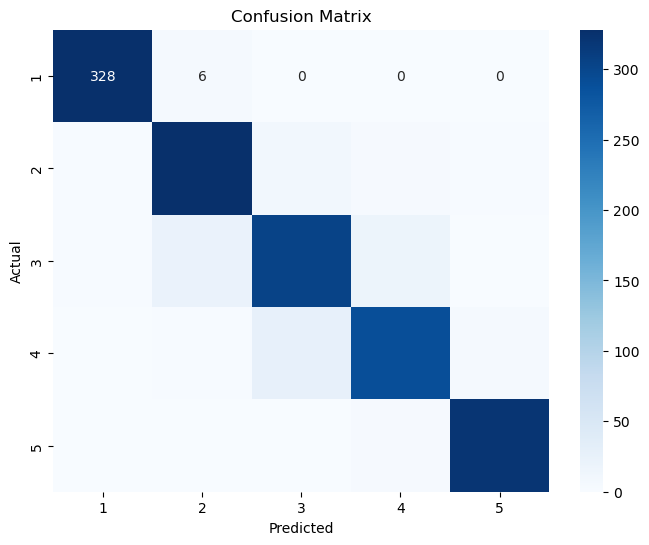

In [34]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_rf_class)

# Define labels for the confusion matrix
labels = [1, 2, 3, 4, 5]

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Display results
print("Confusion Matrix:")
display(cm_df)
acc_score = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Accuracy Score:{acc_score}")
print("Classification Report")
print(classification_report(y_test_class, y_pred_rf_class))

Confusion Matrix:


,1,2,3,4,5
1,328,6,0,0,0
2,2,328,11,4,2
3,2,23,304,19,1
4,0,2,27,290,6
5,0,1,0,5,321


Accuracy Score:0.9340071343638525
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       334
           2       0.91      0.95      0.93       347
           3       0.89      0.87      0.88       349
           4       0.91      0.89      0.90       325
           5       0.97      0.98      0.98       327

    accuracy                           0.93      1682
   macro avg       0.93      0.93      0.93      1682
weighted avg       0.93      0.93      0.93      1682



In [36]:
# Calculate feature importances
feature_importances = rf_clf.feature_importances_

# Sort features by importance
sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True)

[(0.36688790771626095, 'TimeInSeconds_ThisWorkSegment'),
 (0.06803734306469046, 'EPM_InstanceNumber'),
 (0.06658277183451891, 'Assembly_WeightEachLbs'),
 (0.057392003829980734, 'Assembly_MainPartLengthFt'),
 (0.05259988573976899, 'EPM_ProductionControlItemID'),
 (0.04867799353096915, 'Assembly_TotalQuantityInJob'),
 (0.044170821424692024, 'Assembly_NumSmallParts'),
 (0.04306098934678675, 'EPM_AdjustedStationName_Material Handling'),
 (0.019547437274002523, 'EPM_AdjustedStationName_Weld'),
 (0.01855899815603095, 'EPM_AdjustedStationName_Fab/Layout'),
 (0.011448161287910898, 'Assembly_MainPieceProductionCode_SHIM STACK'),
 (0.008213495739408203, 'Assembly_MainPartShape_FB'),
 (0.008195422082514498, 'Assembly_MainPartFinishDescr_N - No Paint'),
 (0.006716517751924448, 'Assembly_MainPartShape_PL'),
 (0.005872663497162741, 'Assembly_MainPartFinishDescr_D - Steel, Paint All'),
 (0.005433970683690447, 'Assembly_MainPartFinishDescr_G - Galvanized'),
 (0.00536938723102151, 'EPM_AdjustedStationN

<Figure size 1000x600 with 0 Axes>

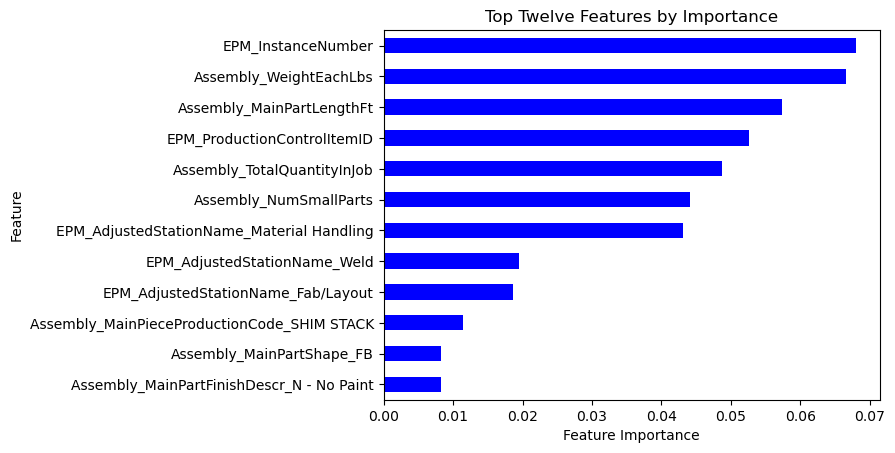

In [38]:
plt.figure(figsize=(10, 6))
# Exclude TimeInSeconds_ThisWorkSegment feature
feature_importance_df = pd.DataFrame(sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True))
feature_importance_df.set_index(feature_importance_df[1], inplace=True)
feature_importance_df.drop(columns=1, inplace=True)
feature_importance_df.rename(columns={0:'Feature Importances'}, inplace=True)
feature_importance_sorted = feature_importance_df.sort_values(by='Feature Importances')
top_twelve_features = feature_importance_sorted[:-1].tail(12)  # Excluding TimeInSeconds_ThisWorkSegment and selecting the top twelve features
top_twelve_features.plot(kind='barh', color='blue', title='Top Twelve Features by Importance', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()